In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as Housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import datasets, linear_model

In [222]:
Housing = pd.read_csv('housing_1_.csv')
Housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [223]:
print('Number of rows of data:', Housing.shape[0])
print('Number of cols of data:', Housing.shape[1])

Number of rows of data: 506
Number of cols of data: 14


In [224]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       452 non-null float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [225]:
Housing.dropna(inplace=True)
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
CRIM       452 non-null float64
ZN         452 non-null float64
INDUS      452 non-null float64
CHAS       452 non-null float64
NOX        452 non-null float64
RM         452 non-null float64
AGE        452 non-null float64
DIS        452 non-null float64
RAD        452 non-null int64
TAX        452 non-null float64
PTRATIO    452 non-null float64
B          452 non-null float64
LSTAT      452 non-null float64
MEDV       452 non-null float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [226]:
Housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


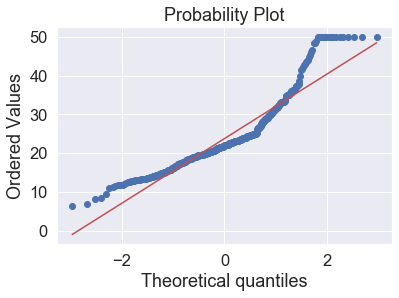

In [227]:
# Q-Q plot
from scipy import stats
stats.probplot(Housing.MEDV,dist="norm",plot=plt)
plt.show()

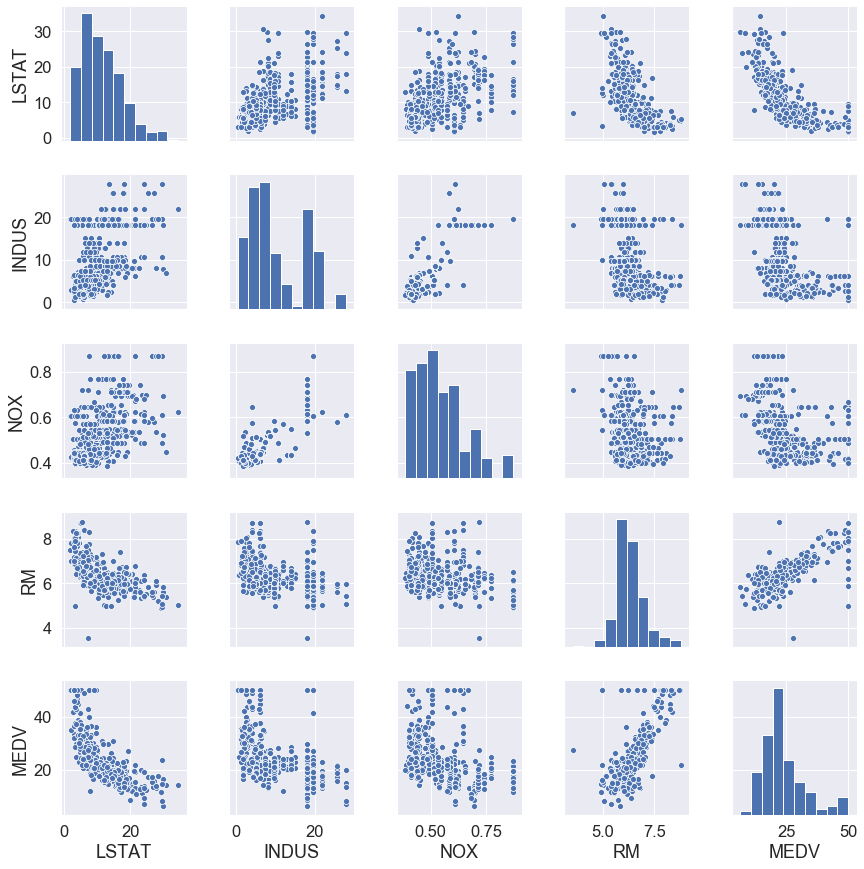

In [228]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(Housing[cols], height=2.5)
plt.show()

In [229]:
corMat= pd.DataFrame(Housing.corr())
corMat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.281239,0.573822,0.050066,0.636941,-0.142458,0.447664,-0.461967,0.897988,0.825668,0.319470,-0.413014,0.424789,-0.286245
ZN,-0.281239,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.573822,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050066,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.636941,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.142458,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.447664,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.461967,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897988,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.825668,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


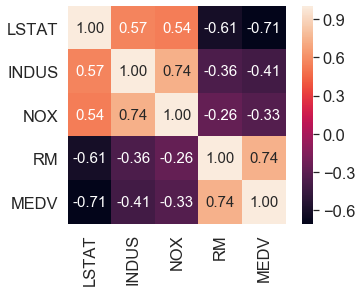

In [230]:
cm = np.corrcoef(Housing[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [231]:
Housing2=pd.read_csv('housing2 (1).csv')
Housing2.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [232]:
Housing2.dropna(inplace=True)

In [233]:
#spilt train and test data 
X = Housing.iloc[:, :-1].values
y = Housing['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (361, 13)
Shape of y_train:  (361,)
Shape of X_test:  (91, 13)
Shape of y_test:  (91,)


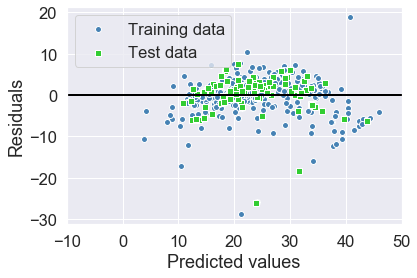

intercept= 20.400207709317137
coef = [-2.10978212e-01  3.03333448e-02  5.21741626e-02  1.78646977e+00
 -1.16261232e+01  5.31801604e+00 -2.06780275e-02 -1.33978603e+00
  2.48794157e-01 -9.31036789e-03 -8.78367327e-01  1.36707717e-02
 -4.79318745e-01]
training set R2 = 0.7473120147155756
trainging set MSE = 20.042440176225448
test set R2= 0.6976755382220078
test set MSE= 20.97527480897779


In [234]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
plt.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()


print('intercept=',regressor.intercept_)
print('coef =', regressor.coef_)
print('training set R2 =', regressor.score(X_train,y_train))
print('trainging set MSE =', mean_squared_error(regressor.predict(X_train),y_train))
print('test set R2=' , regressor.score(X_test, y_test))
print('test set MSE=', mean_squared_error(regressor.predict(X_test),y_test))


In [249]:
# LASSO
from sklearn.linear_model import Lasso
alpha=np.arange(0.001,0.05,0.001)
min_test_mse_list=[]
lasso_list=[]
lasso_inter=[]
for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    min_test_mse_list.append(mean_squared_error(lasso.predict(X_test), y_test))
    lasso_list.append(lasso.coef_)
    lasso_inter.append(lasso.intercept_)
    train_R2 = lasso.score(X_train, y_train)
    test_R2 = lasso.score(X_test, y_test)
    train_mse = mean_squared_error(lasso.predict(X_train), y_train)



index=min_test_mse_list.index(min(min_test_mse_list))
print('Lowest test MSE is ',min(min_test_mse_list))
lasso_coef = lasso_list[index]
print('cofficient=',lasso_coef)
intercept = lasso_inter[index]
print('intercept: ', intercept)
print('Alpha is',alpha[index])
print('testing set R2',train_R2)
print('training set MSE: ', train_mse)
print('testing set R2: ', test_R2)
print('testing set MSE: ',min(min_test_mse_list))



Lowest test MSE is  20.977598457791352
cofficient= [-2.12922694e-01  3.04332629e-02  5.07831570e-02  1.77038790e+00
 -1.12909059e+01  5.32071514e+00 -2.09122042e-02 -1.33473846e+00
  2.48409298e-01 -9.34453280e-03 -8.74241708e-01  1.36946636e-02
 -4.79681930e-01]
intercept:  20.148932141748794
Alpha is 0.001
testing set R2 0.7416318589203639
training set MSE:  20.492972806769913
testing set R2:  0.6893963900753703
testing set MSE:  20.977598457791352


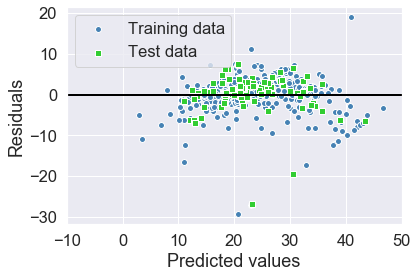

In [237]:
lasso.predict(X_test)-y_test
plt.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()


In [248]:
# Ridge
from sklearn.linear_model import Ridge
alpha=np.arange(0.001,1,0.001)
min_test_mse_list=[]
ridge_list=[]
ridge_inter=[]
for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    min_test_mse_list.append(mean_squared_error(ridge.predict(X_test), y_test))
    ridge_list.append(ridge.coef_)
    ridge_inter.append(lasso.intercept_)
    train_R2 = ridge.score(X_train, y_train)
    test_R2 = ridge.score(X_test, y_test)
    train_mse = mean_squared_error(ridge.predict(X_train), y_train)



index=min_test_mse_list.index(min(min_test_mse_list))
print('Lowest test MSE is ',min(min_test_mse_list))
ridge_coef = ridge_list[index]
print('cofficient=',ridge_coef)
intercept = ridge_inter[index]
print('intercept: ', intercept)
print('Alpha is',alpha[index])
print('testing set R2',train_R2)
print('training set MSE: ', train_mse)
print('testing set R2: ', test_R2)
print('testing set MSE: ',min(min_test_mse_list))



Lowest test MSE is  20.972155005045828
cofficient= [-2.21508966e-01  3.06713432e-02  4.79510646e-02  1.76970162e+00
 -1.06080919e+01  5.32991970e+00 -2.14846991e-02 -1.32583747e+00
  2.48661225e-01 -9.40815843e-03 -8.65912267e-01  1.37282019e-02
 -4.79842685e-01]
intercept:  11.998319335564064
Alpha is 0.10500000000000001
testing set R2 0.7461319990329783
training set MSE:  20.13603542056935
testing set R2:  0.696850019487351
testing set MSE:  20.972155005045828


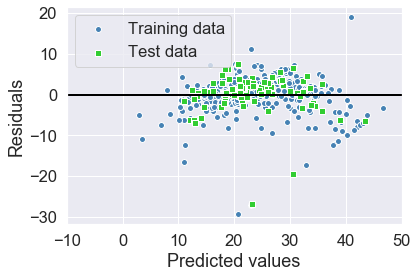

In [250]:
ridge.predict(X_test)-y_test
plt.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [251]:
print("My name is Yuli Tang")
print("My NetID is: ytang56")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yuli Tang
My NetID is: ytang56
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [254]:
print("conclusion： From the above, I read Housing(1), then I explore data by showing the head, info , number of rows and cols. ")
print("I also draw the heat map and Q-Q plot for the data and I took some code from the book")
print("For the second part of the HW, I fit three models regression and draw the residuals plot, they are looks similar but not complete same")
print("From the output for three models, we could see for training set MSE: Linear<ridge<lasso means the smaller MSE, the model better fit the data")
print("I also show the best alpha number for ridge and lasso, they are 0.10500000000000001 for ridge and 0.001 for lasso.  ")

conclusion： From the above, I read Housing(1), then I explore data by showing the head, info , number of rows and cols. 
I also draw the heat map and Q-Q plot for the data and I took some code from the book
For the second part of the HW, I fit three models regression and draw the residuals plot, they are looks similar but not complete same
From the output for three models, we could see for training set MSE: Linear<ridge<lasso means the smaller MSE, the model better fit the data
I also show the best alpha number for ridge and lasso, they are 0.10500000000000001 for ridge and 0.001 for lasso.  
